In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer

import warnings

In [110]:
df = pd.read_csv("stud.csv")

In [111]:
total  = df["math_score"] + df['reading_score'] + df['writing_score']
df["average"] = total / 3

In [112]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [113]:
X = df.drop("average",axis = 1)
y = df["average"]

In [114]:
numerical_features = X.select_dtypes(exclude = "object").columns
categorical_features = X.select_dtypes(include = "object").columns

In [115]:
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [116]:
scaler_transformer = StandardScaler()
oh_encoder_transformer = OneHotEncoder(handle_unknown="ignore")

In [117]:
transformer = ColumnTransformer([
    ("scaler",scaler_transformer, numerical_features),
    ("OneHotEncoder",oh_encoder_transformer, categorical_features)
    ])

In [118]:
X = transformer.fit_transform(X)

In [119]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [120]:
print(X_train.shape, X_test.shape)

(800, 20) (200, 20)


In [121]:
def model_evaluate(true, predict):
    mse = mean_squared_error(true, predict)
    r2 = r2_score(true, predict)
    mae = mean_absolute_error(true, predict)
    return mse, r2, mae

In [125]:
models = {
    "LinearRegression":LinearRegression(),
   "Lasso":Lasso(),
    "Ridge":Ridge(),
    "SVR":SVR(),
    "Decision Tree":DecisionTreeRegressor(),
    "k-Neighbour":KNeighborsRegressor(),
    "Random Forest":RandomForestRegressor(),
    "Xgboost":XGBRegressor(),
    
}
model_list = []
r2_list = []

for i in range(len(models)):
    #model_train
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # making prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #model Evalution
    train_mse, train_r2, train_mae = model_evaluate(y_train, y_train_pred)  #training data evalution
    test_mse, test_r2, test_mae = model_evaluate(y_test, y_test_pred)   #test data evalution
    
    model_list.append(list(models.keys())[i])
    print(list(models.values())[i])
    print("model performance in training data")
    print("Mean Square Error: ", train_mse)
    print("Mean Absolute Error: ", train_mae)
    print("R2 score: ", train_r2)
    print("\n")
    
    print("model performance in test data")
    print("Mean Square Error: ", test_mse)
    print("Mean Absolute Error: ", test_mae)
    print("R2 score: ", test_r2)
    print("===================================\n\n\n")
    
    r2_list.append(test_r2)

LinearRegression()
model performance in training data
Mean Square Error:  2.501320158274784e-28
Mean Absolute Error:  1.2807532812075806e-14
R2 score:  1.0


model performance in test data
Mean Square Error:  2.5458119133292495e-28
Mean Absolute Error:  1.2754242106893798e-14
R2 score:  1.0



Lasso()
model performance in training data
Mean Square Error:  1.1487211071792789
Mean Absolute Error:  0.8600430388803986
R2 score:  0.9942097175294325


model performance in test data
Mean Square Error:  1.3446592176568362
Mean Absolute Error:  0.8984569939328597
R2 score:  0.9939331307394952



Ridge()
model performance in training data
Mean Square Error:  6.422525272399515e-05
Mean Absolute Error:  0.006440042145627212
R2 score:  0.9999996762640185


model performance in test data
Mean Square Error:  7.686384984800707e-05
Mean Absolute Error:  0.006779850612709559
R2 score:  0.9999996532036357



SVR()
model performance in training data
Mean Square Error:  9.424895663028055
Mean Absolute Erro

In [133]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=["models", "R2_score"]).sort_values(by=["R2_score"], ascending=False)

,models,R2_score
0,LinearRegression,1.000000
2,Ridge,1.000000
7,Xgboost,0.995924
1,Lasso,0.993933
6,Random Forest,0.993641
4,Decision Tree,0.986565
5,k-Neighbour,0.961382
3,SVR,0.898793


# Linear Regression

In [134]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("accuracy: ", r2)

accuracy:  1.0


# plot y_pred and y_test

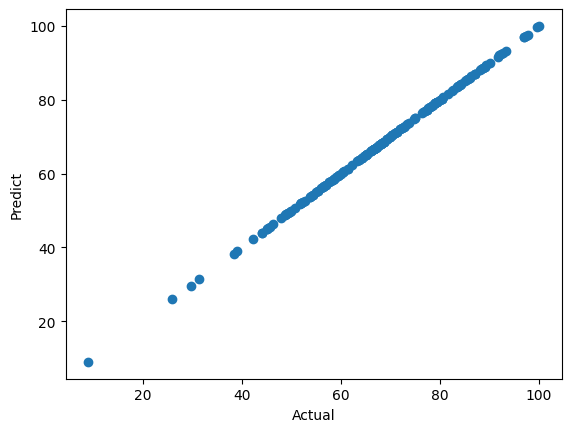

In [136]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.show()

<Axes: xlabel='average'>

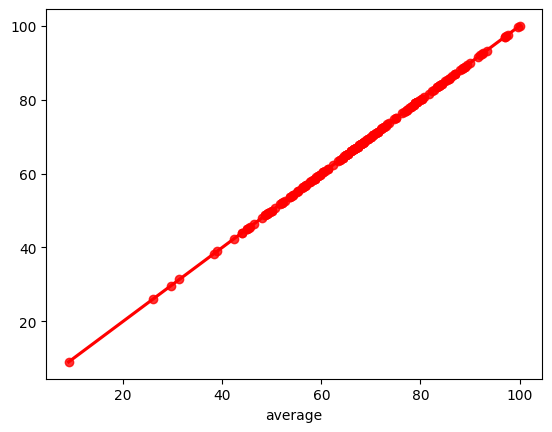

In [137]:
sns.regplot(x=y_test, y=y_pred,color="red")